In [1]:
import pandas as pd
import mysql.connector

import os



In [2]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')  
]


In [3]:
# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='jon5w1',
    database='ecommerce'
)


In [4]:

cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:\PROJECT_DATA_ANALYSIS\SQL+PYTHON E-COMMERCE SALES PROJECT\E-Commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shatabdi\AppData\Local\Temp\ipykernel_13692\247792747.py:4: SyntaxWarning: invalid escape sequence '\P'
  folder_path = 'E:\PROJECT_DATA_ANALYSIS\SQL+PYTHON E-COMMERCE SALES PROJECT\E-Commerce'


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = 'localhost',
                            username = 'root',
                            password = 'jon5w1',
                            database = 'ecommerce')
cur = db.cursor()



# List all unique cities where customers are located 

In [6]:
query = """ SELECT distinct CUSTOMER_CITY FROM CUSTOMERS """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=['UNINIQUE CUSTOMER CITY'])

df


,UNINIQUE CUSTOMER CITY
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2017.

In [7]:
query = """ select count(order_id) as order_placed 
from orders 
where year(order_purchase_timestamp)=2017 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns=[""" total orders placed in 2017 are """])

df


,total orders placed in 2017 are
0,270606


# Find the total sales per category.

In [8]:
query = """ 

SELECT  pp.product_category, round(SUM(p.payment_value)) AS total_sales
FROM products pp
INNER JOIN order_items oi ON pp.product_id = oi.product_id
INNER JOIN payments p ON oi.order_id = p.order_id
GROUP BY pp.product_category;




"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=['CATEGORY','SALES'])

df

,CATEGORY,SALES
0,perfumery,76010799.0
1,Furniture Decoration,214526459.0
2,telephony,73032308.0
3,bed table bath,256883051.0
4,automotive,127844150.0
...,...,...
69,cds music dvds,179915.0
70,La Cuisine,437030.0
71,Fashion Children's Clothing,117851.0
72,PC Gamer,326165.0


# Calculate the percentage of orders that were paid in installments.

In [9]:
query = """ 

SELECT SUM((
CASE 
WHEN PAYMENT_INSTALLMENTS >= 1 
then 1 
ELSE 0 
END) ) / count(*) *100 AS PERCENTAGE_INSTALLMENTS
FROM PAYMENTS;



"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['PERCENTAGE_INSTALLMENTS'])

df

,PERCENTAGE_INSTALLMENTS
0,99.9981


# Count the number of customers from each state.

In [10]:
query = """ 

SELECT CUSTOMER_STATE , COUNT(distinct CUSTOMER_UNIQUE_ID) AS CUSTOMER_COUNT
FROM CUSTOMERS
GROUP BY 1;


"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['CUSTOMER_STATE','CUSTOMER_COUNT'])

df

,CUSTOMER_STATE,CUSTOMER_COUNT
0,AC,77
1,AL,401
2,AM,143
3,AP,67
4,BA,3277
5,CE,1313
6,DF,2075
7,ES,1964
8,GO,1952
9,MA,726


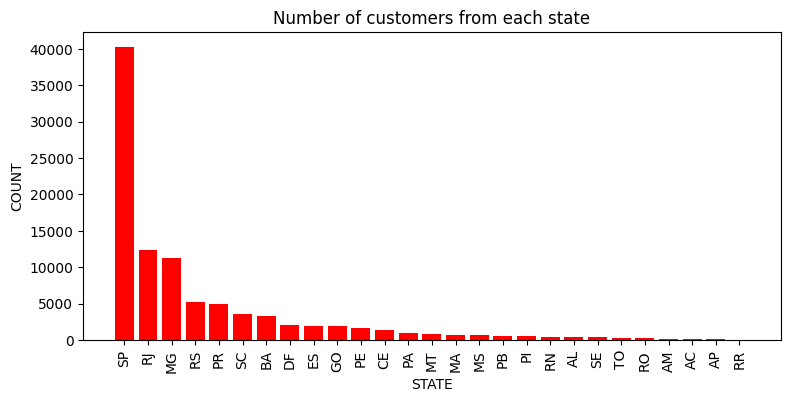

In [11]:
df = df.sort_values(by='CUSTOMER_COUNT',ascending=False)
plt.figure(figsize=(9,4))
plt.bar(df['CUSTOMER_STATE'],df['CUSTOMER_COUNT'],color='red')
plt.xlabel('STATE')
plt.ylabel('COUNT')
plt.xticks(rotation=90)
plt.title('Number of customers from each state')
plt.show()


# Calculate the number of orders per month in 2018.

In [12]:
query = """ 

SELECT date_format(ORDER_PURCHASE_TIMESTAMP,'%M') AS ORDER_MONTH , 
count(ORDER_ID) AS ORDER_COUNT 
 FROM ORDERS
 WHERE YEAR(ORDER_PURCHASE_TIMESTAMP) = 2018
 group by 1
 order by 2 DESC;

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['ORDER_MONTH','ORDER_COUNT'])

df

,ORDER_MONTH,ORDER_COUNT
0,January,43614
1,March,43266
2,April,41634
3,May,41238
4,February,40368
5,August,39072
6,July,37752
7,June,37002
8,September,96
9,October,24


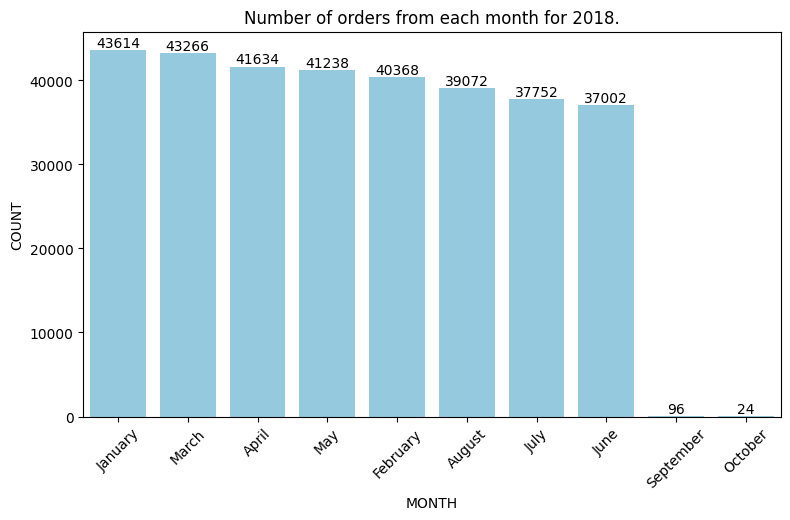

In [13]:
df = df.sort_values(by='ORDER_COUNT',ascending=False)
plt.figure(figsize=(9,5))
ax= sns.barplot(x='ORDER_MONTH',y='ORDER_COUNT',data=df,color='skyblue')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title('Number of orders from each month for 2018.')
plt.show()


# Find the average number of products per order, grouped by customer city.

In [14]:
query = """ 

WITH COUNT_PER_ORDER AS
(
SELECT o.ORDER_ID, o.CUSTOMER_ID, COUNT(OO.ORDER_ID) AS OC
FROM ORDERS o 
INNER JOIN ORDER_ITEMS OO
ON o.ORDER_ID = OO.ORDER_ID
GROUP BY 1,2
)

SELECT customers.customer_city, round(AVG(COUNT_PER_ORDER.OC),2) AS AVG_ORDERS
FROM customers
INNER JOIN COUNT_PER_ORDER
ON customers.customer_id = COUNT_PER_ORDER.CUSTOMER_ID
GROUP BY 1
ORDER BY 2 DESC;


"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['CUSTOMER_CITY','AVERAGE_ORDERS'])

df

,CUSTOMER_CITY,AVERAGE_ORDERS
0,padre carvalho,210.00
1,celso ramos,195.00
2,datas,180.00
3,candido godoi,180.00
4,matias olimpio,150.00
...,...,...
4105,sao mamede,30.00
4106,sambaiba,30.00
4107,japaratuba,30.00
4108,tuiuti,30.00


In [15]:
# TOP 10 DATA
df.head(10)

,CUSTOMER_CITY,AVERAGE_ORDERS
0,padre carvalho,210.00
1,celso ramos,195.00
2,datas,180.00
3,candido godoi,180.00
4,matias olimpio,150.00
5,cidelandia,120.00
6,curralinho,120.00
7,picarra,120.00
8,morro de sao paulo,120.00
9,teixeira soares,120.00


# Calculate the percentage of total revenue contributed by each product category.

In [16]:
query = """ 

SELECT  pp.product_category,ROUND((SUM(p.payment_value)) /(SELECT sum(payment_value) FROM payments)*100,2) AS SALES_PERCENTAGE
FROM products pp
INNER JOIN order_items oi ON pp.product_id = oi.product_id
INNER JOIN payments p ON oi.order_id = p.order_id
GROUP BY pp.product_category
ORDER BY 2 DESC;



"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['CATEGORY','SALES_PERCENTAGE'])

df

,CATEGORY,SALES_PERCENTAGE
0,bed table bath,320.93
1,HEALTH BEAUTY,310.59
2,computer accessories,297.08
3,Furniture Decoration,268.01
4,Watches present,267.83
...,...,...
69,PC Gamer,0.41
70,House Comfort 2,0.32
71,cds music dvds,0.22
72,Fashion Children's Clothing,0.15


# Identify the correlation between product price and the number of times a product has been purchased.

In [17]:
query = """ 


select products.product_category, count(order_items.product_id) as order_count , round(avg(order_items.price),2) as price
from products
inner join order_items
on products.product_id = order_items.product_id
group by 1;



"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['CATEGORY','ORDER_COUNT','PRICE'])

df

,CATEGORY,ORDER_COUNT,PRICE
0,HEALTH BEAUTY,290100,130.16
1,sport leisure,259230,114.34
2,Cool Stuff,113880,167.36
3,computer accessories,234810,116.51
4,Watches present,179730,201.14
...,...,...,...
69,CITTE AND UPHACK FURNITURE,1140,114.95
70,Hygiene diapers,1170,40.19
71,flowers,990,33.64
72,insurance and services,60,141.64


In [18]:
import numpy as np
arr1 = df['ORDER_COUNT']
arr2 = df['PRICE']
a = np.corrcoef(arr1,arr2)
a



array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [19]:
print('The correlation between price and the number of times a product has been purchased ',a[0][1])

The correlation between price and the number of times a product has been purchased  -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [20]:


query = """
WITH REVENUEGENERATED AS (
    SELECT 
        OI.SELLER_ID, 
        ROUND(SUM(PY.PAYMENT_VALUE), 2) AS REVENUE
    FROM
        ORDER_ITEMS OI
    JOIN
        PAYMENTS PY ON OI.ORDER_ID = PY.ORDER_ID
    GROUP BY 1
)
SELECT *,
    DENSE_RANK() OVER (ORDER BY REVENUE DESC) AS RANK_REVENUE
FROM REVENUEGENERATED;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['SELLER_ID', 'REVENUE', 'RANK_REVENUE'])


df

,SELLER_ID,REVENUE,RANK_REVENUE
0,7c67e1448b00f6e969d365cea6b010ab,12679172.68,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,7705551.00,2
2,4a3ca9315b744ce9f8e9374361493884,7531131.74,3
3,1f50f920176fa81dab994f9023523100,7256335.50,4
4,53243585a1d6dc2643021fd1853d8905,7122577.01,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,480.25,3076
3091,702835e4b785b67a084280efca355756,464.00,3077
3092,4965a7002cca77301c82d3f91b82e1a9,409.00,3078
3093,77128dec4bec4878c37ab7d6169d6f26,380.50,3079


In [21]:
df = df.head()

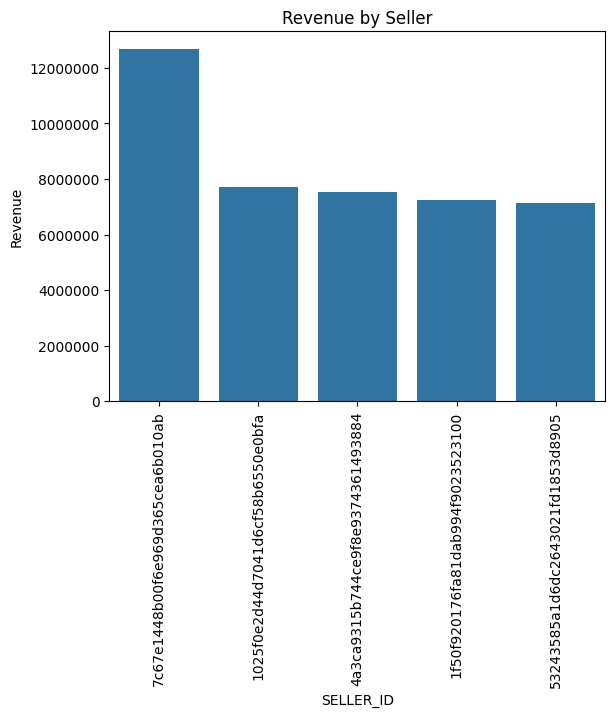

In [22]:
import matplotlib.ticker as ticker
sns.barplot(x='SELLER_ID', y='REVENUE', data=df)
plt.xticks(rotation=90)
 
plt.ylabel('Revenue') 
plt.title('Revenue by Seller')

# Format y-axis to show full numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))

plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [59]:


query = """

WITH PaymentData AS (
    SELECT DISTINCT
        orders.customer_id, 
        orders.order_purchase_timestamp, 
        payments.payment_value AS payment
    FROM 
        payments
    JOIN 
        orders
    ON 
        payments.order_id = orders.order_id
)

SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment,
    ROUND(AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ),2)AS mov_avg
FROM 
    PaymentData
ORDER BY 
    order_purchase_timestamp;


"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['CUSTOMER_ID', 'ORDER_PURCHASE_TIMESTAMP', 'PAYMENT', 'MOVING_AVERAGE'])


df

,CUSTOMER_ID,ORDER_PURCHASE_TIMESTAMP,PAYMENT,MOVING_AVERAGE
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.23
1,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,75.06,75.06
2,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,40.95,40.95
3,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,109.34,109.34
4,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,45.46,45.46
...,...,...,...,...
103266,2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:03,137.03,137.03
103267,bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:09,80.38,80.38
103268,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29,197.55,197.55
103269,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:02,222.03,222.03


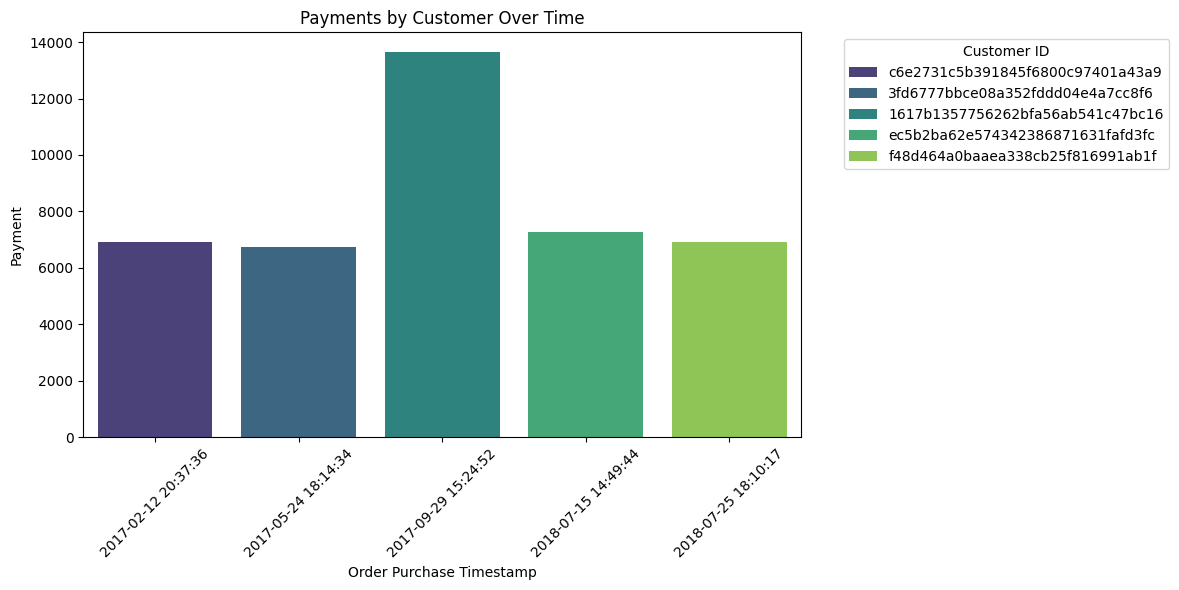

In [61]:


# Assuming your data is in a DataFrame called `df`
# Convert 'ORDER_PURCHASE_TIMESTAMP' to datetime if not already
df['ORDER_PURCHASE_TIMESTAMP'] = pd.to_datetime(df['ORDER_PURCHASE_TIMESTAMP'])

# Optionally, filter for a few customers to avoid clutter
# For example, select the top 5 customers by total payment
top_customers = df.groupby('CUSTOMER_ID')['PAYMENT'].sum().nlargest(5).index
filtered_data = df[df['CUSTOMER_ID'].isin(top_customers)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(
    x='ORDER_PURCHASE_TIMESTAMP', 
    y='PAYMENT', 
    hue='CUSTOMER_ID', 
    data=filtered_data, 
    palette='viridis', 
    errorbar=None  # Disable confidence intervals for bar plots
)

# Add labels and title
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Payment')
plt.title('Payments by Customer Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

# Calculate the cumulative sales per month for each year.

In [56]:


query = """
WITH MonthlyPayment AS (
    SELECT 
        MONTH(OO.ORDER_PURCHASE_TIMESTAMP) AS MONTH,
        YEAR(OO.ORDER_PURCHASE_TIMESTAMP) AS YEAR,
        ROUND(SUM(PY.PAYMENT_VALUE), 2) AS PAYMENT
    FROM
        ORDERS OO
    JOIN
        PAYMENTS PY ON OO.ORDER_ID = PY.ORDER_ID
    GROUP BY 
        MONTH, YEAR
    ORDER BY 
        YEAR, MONTH
)

SELECT 
    MONTH,
    YEAR, 
    PAYMENT, 
    ROUND(SUM(PAYMENT) OVER (ORDER BY YEAR, MONTH), 3) AS CUMULATIVE_SALES
FROM 
    MonthlyPayment;


"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['MONTH', 'YEAR', 'PAYMENT', 'CUMULATIVE_SALES'])


df

,MONTH,YEAR,PAYMENT,CUMULATIVE_SALES
0,9,2016,7567.20,7.567200e+03
1,10,2016,1772714.40,1.780282e+06
2,12,2016,588.60,1.780870e+06
3,1,2017,4154641.20,5.935511e+06
4,2,2017,8757240.29,1.469275e+07
5,3,2017,13495907.99,2.818866e+07
6,4,2017,12533640.88,4.072230e+07
7,5,2017,17787564.60,5.850987e+07
8,6,2017,15338291.41,7.384816e+07
9,7,2017,17771487.58,9.161964e+07


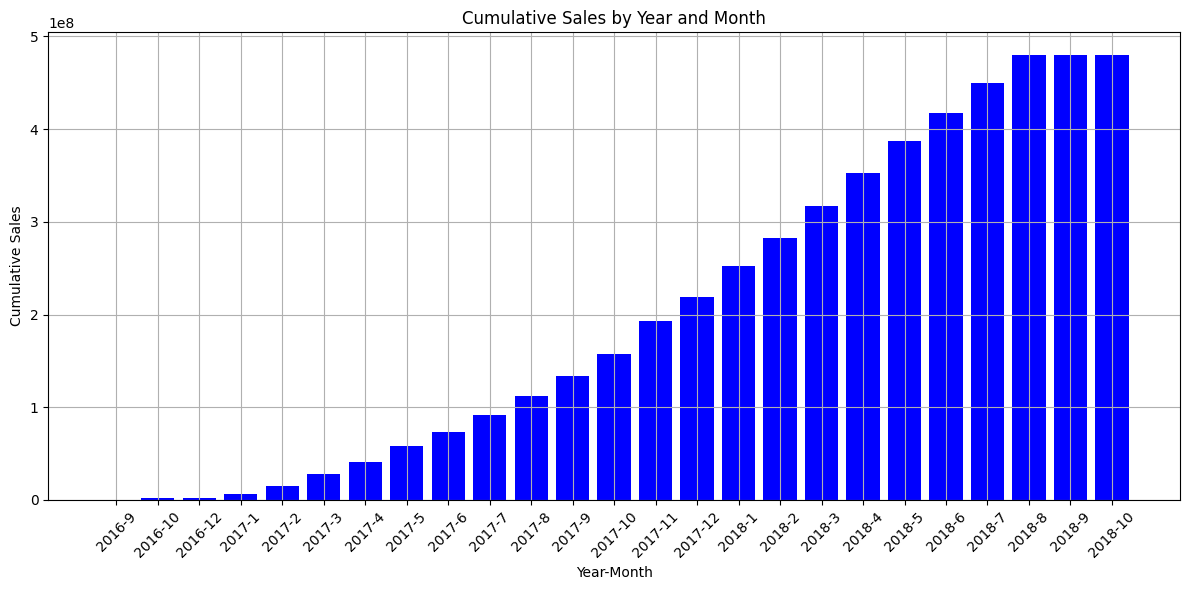

In [57]:
# Combine YEAR and MONTH into a single label
df['YEAR_MONTH'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df['YEAR_MONTH'], df['CUMULATIVE_SALES'], color='blue')
plt.title('Cumulative Sales by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate the year-over-year growth rate of total sales.

In [26]:
query = """

WITH YearlySales AS (
    SELECT 
        YEAR(OO.ORDER_PURCHASE_TIMESTAMP) AS YEAR,
        ROUND(SUM(PY.PAYMENT_VALUE), 2) AS PAYMENT
    FROM
        ORDERS OO
    JOIN
        PAYMENTS PY ON OO.ORDER_ID = PY.ORDER_ID
    GROUP BY 
        YEAR
    ORDER BY 
        YEAR
),

SalesComparison AS (
    SELECT 
        YEAR, 
        PAYMENT AS current_sales, 
        LAG(PAYMENT, 1) OVER (ORDER BY YEAR) AS Previous_year_sales
    FROM 
        YearlySales
)

SELECT 
    YEAR, 
    ROUND((current_sales - Previous_year_sales) / Previous_year_sales, 2) * 100 AS year_over_year_growth
FROM 
    SalesComparison;

"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['YEAR','YEAR_OVER_YEAR_GROWTH'])


df

,YEAR,YEAR_OVER_YEAR_GROWTH
0,2016,NaN
1,2017,12113.0
2,2018,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [30]:
query = """
WITH FirstPurchase AS (
    -- Step 1: Find the first purchase date for each customer
    SELECT 
        CC.CUSTOMER_ID,
        MIN(OO.order_purchase_timestamp) AS FIRST_PURCHASE
    FROM 
        CUSTOMERS CC
    JOIN 
        ORDERS OO ON CC.CUSTOMER_ID = OO.CUSTOMER_ID
    GROUP BY 
        CC.CUSTOMER_ID
),
SixMonthActivity AS (
    -- Step 2: Calculate the end of the 6-month period after the first purchase
    SELECT 
        FP.CUSTOMER_ID,
        FP.FIRST_PURCHASE,
        DATE_ADD(FP.FIRST_PURCHASE, INTERVAL 6 MONTH) AS SIX_MONTH_END_DATE
    FROM 
        FirstPurchase FP
),
Retention AS (
    -- Step 3: Identify customers who made a purchase within 6 months after their first purchase
    SELECT 
        SMA.CUSTOMER_ID,
        COUNT(DISTINCT OO.order_purchase_timestamp) AS NEXT_PURCHASE
    FROM 
        SixMonthActivity SMA
    JOIN 
        ORDERS OO ON OO.CUSTOMER_ID = SMA.CUSTOMER_ID
    WHERE 
        OO.order_purchase_timestamp > SMA.FIRST_PURCHASE
        AND OO.order_purchase_timestamp < SMA.SIX_MONTH_END_DATE
    GROUP BY 
        SMA.CUSTOMER_ID
)
-- Step 4: Calculate the 6-month retention rate
SELECT 
    100* (COUNT(DISTINCT R.CUSTOMER_ID)  / COUNT(DISTINCT FP.CUSTOMER_ID)) AS SIX_MONTH_RETENTION_RATE
FROM 
    FirstPurchase FP
LEFT JOIN 
    Retention R ON FP.CUSTOMER_ID = R.CUSTOMER_ID;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['SIX_MONTH_RETENTION_RATE'])
df

,SIX_MONTH_RETENTION_RATE
0,0.0000


# Identify the top 3 customers who spent the most money in each year.

In [38]:
query = """
WITH CustomerYearlyPayments AS (
    SELECT 
        orders.customer_id,
        YEAR(orders.order_purchase_timestamp) AS YEARS,
        ROUND(SUM(payments.PAYMENT_VALUE), 2) AS PAYMENT,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp)
            ORDER BY SUM(payments.PAYMENT_VALUE) DESC
        ) AS PAYMENT_RANK
    FROM 
        orders
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        orders.customer_id, YEAR(orders.order_purchase_timestamp)
)

SELECT 
    CUSTOMER_ID, 
    YEARS, 
    PAYMENT, 
    PAYMENT_RANK
FROM 
    CustomerYearlyPayments
WHERE 
    PAYMENT_RANK <= 3;
"""

# Execute the query
cur.execute(query)

# Fetch the results
data = cur.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=['CUSTOMER_ID', 'YEARS', 'PAYMENT', 'PAYMENT_RANK'])

print(df)

                        CUSTOMER_ID  YEARS   PAYMENT  PAYMENT_RANK
0  a9dc96b027d1252bbac0a9b72d837fc6   2016   42706.5             1
1  1d34ed25963d5aae4cf3d7f3a4cda173   2016   42022.2             2
2  4a06381959b6670756de02e07b83815f   2016   36833.4             3
3  1617b1357756262bfa56ab541c47bc16   2017  409922.4             1
4  c6e2731c5b391845f6800c97401a43a9   2017  207879.3             2
5  3fd6777bbce08a352fddd04e4a7cc8f6   2017  201799.8             3
6  ec5b2ba62e574342386871631fafd3fc   2018  218246.4             1
7  f48d464a0baaea338cb25f816991ab1f   2018  207666.3             2
8  e0a2412720e9ea4f26c1ac985f6a7358   2018  144283.2             3


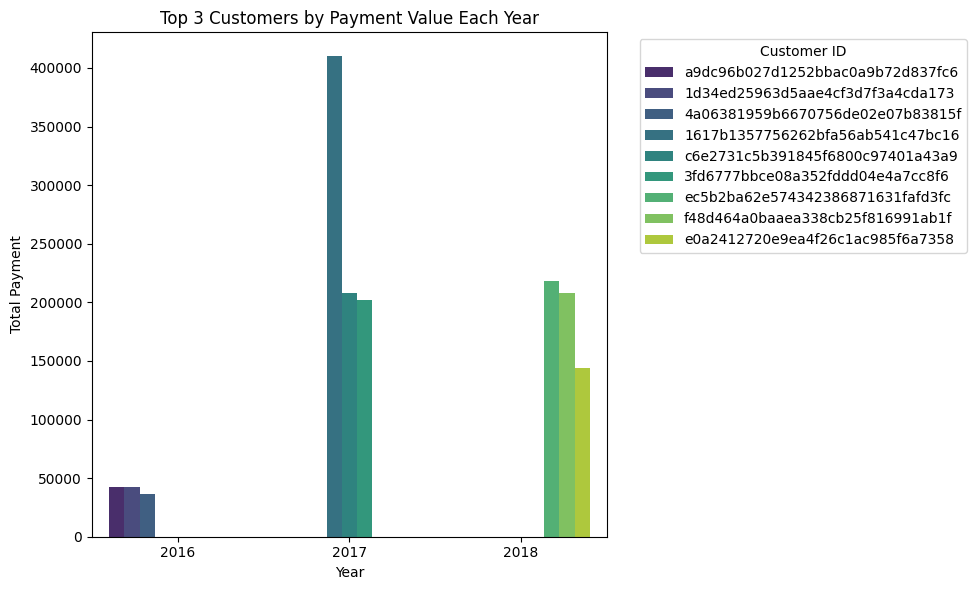

In [39]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='YEARS', y='PAYMENT', hue='CUSTOMER_ID', data=df, palette='viridis')
plt.title('Top 3 Customers by Payment Value Each Year')
plt.xlabel('Year')
plt.ylabel('Total Payment')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()